# Regression Model: Random Forest
In this part, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
#let us import the data from previous part
df = pd.read_csv('/home/alejandrodf1/Documents/computational_drug_discovery_project/data/processed/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df.head(5)
df.shape

(5798, 882)

### Input Features
The acetylcholinesterase have 5798 input features and 1 output variable (pIC50 values).

In [6]:
# INPUT FEATURES
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5794,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5795,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5796,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# OUTPUT FEATURES
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5793    8.590067
5794    8.621602
5795    9.387216
5796    9.200659
5797    8.903090
Name: pIC50, Length: 5798, dtype: float64

Let us make sure the data dimensions are consistent

In [8]:
print(X.shape)
print(Y.shape)

(5798, 881)
(5798,)


#### Removing low variance input features

In [21]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 *( 1 - .8)))
X = selection.fit_transform(X)

In [22]:
X.shape #remove columns

(5798, 144)

#### Data Split: For training and testing (80/20 ratio)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [24]:
X_train.shape , Y_train.shape 

((4638, 144), (4638,))

In [25]:
X_test.shape, Y_test.shape

((1160, 144), (1160,))

#### Building the Regression model: Random Forest

In [26]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train) #trainig the model

#testing procedure
r2 = model.score(X_test, Y_test)
r2

0.4150234963307535

In [27]:
Y_pred = model.predict(X_test)

In [60]:
import numpy as np
list(Y_pred)
list(Y_test)

[2.2753146117626404,
 5.795880017344075,
 5.9484616094846725,
 5.698970004336019,
 6.638272163982407,
 4.301029995663981,
 6.632644078973981,
 5.449771646944906,
 8.193820026016112,
 4.709965388637482,
 6.920818753952375,
 8.3767507096021,
 6.6777807052660805,
 4.457299030551889,
 8.537602002101044,
 5.498940737782249,
 9.489991487059765,
 7.552841968657781,
 8.43297363384094,
 2.938924676370208,
 5.565431095965801,
 8.522878745280337,
 7.100015437450609,
 6.245651664288981,
 5.493089274448482,
 8.154901959985743,
 7.096910013008056,
 6.958607314841775,
 5.0,
 6.636764195516306,
 14.30102999566398,
 7.866461091629782,
 5.00436480540245,
 9.3767507096021,
 6.1938200260161125,
 8.0,
 4.554395796726403,
 9.045757490560677,
 5.920818753952375,
 5.6777807052660805,
 3.585026652029182,
 6.6020599913279625,
 4.522878745280337,
 5.79317412396815,
 9.0,
 3.882397308309916,
 5.0,
 5.0,
 7.886056647693163,
 8.045757490560675,
 2.886056647693163,
 5.568636235841013,
 2.337242168318426,
 10.6659485

### Scatter plot: Experimental vs Predicted pIC50 Values

<function matplotlib.pyplot.show(close=None, block=None)>

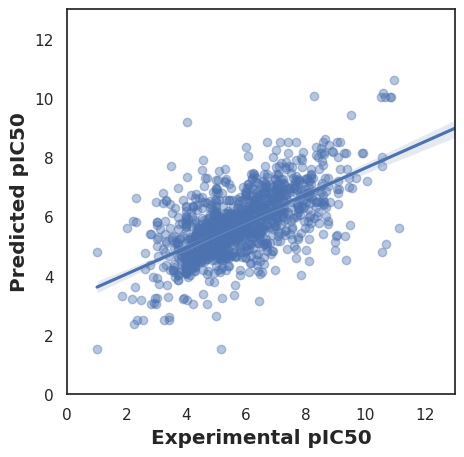

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = Y_test, y = Y_pred, scatter_kws={'alpha':0.4} )
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 13)
ax.set_ylim(0, 13)
ax.figure.set_size_inches(5, 5)
plt.show